<center>
   
# Monte Carlo Methods
    
</center>

Author Name: ______________________ 

The purpose of this project is to study different properties of Monte Carlo methods.  

**General Notes:**
* Policy Evaluation and Improvement: The primary purpose of this project is to evaluate different policies in a reinforcement learning setting, specifically in the context of playing Blackjack. By implementing and testing various player policies, we aim to determine which strategies are most effective in maximizing rewards. This evaluation process helps us understand the importance of making the right decisions at each game state.

* Monte Carlo Methods Exploration: The project delves into the realm of Monte Carlo methods, a powerful class of algorithms for estimating value functions and improving decision-making in reinforcement learning. We employ these methods to estimate state-values, action-values, and optimal policies, gaining insights into how to make more informed choices in stochastic environments like Blackjack.

* Off-Policy Learning: Another key purpose is to explore off-policy learning techniques, which allow us to learn from data generated by one policy while aiming to improve a different target policy. This concept is crucial in real-world scenarios where we may want to leverage historical data to train a more advanced AI agent with a different strategy. By implementing and understanding off-policy Monte Carlo control, we enhance our ability to adapt AI models to varying requirements.

* AI Training Enhancement: The project's broader objective is to showcase the relevance of these reinforcement learning techniques beyond card games. We highlight how the knowledge gained from Blackjack can be applied to improve AI model training across diverse domains. This includes using the learned strategies to enhance private AI models with custom data, optimizing decision-making in various applications, from autonomous vehicles to healthcare systems.

* Reinforcement Learning Research: Lastly, the project serves as a platform for research and experimentation in reinforcement learning. It allows us to study the behavior of different algorithms, understand their strengths and limitations, and contribute to the growing body of knowledge in the field. This research-oriented aspect aligns with the continuous evolution of reinforcement learning techniques and their applications.
- Do not use a mix of python lists and numpy arrays. Every vector or matrix in your code should be a numpy array. 
- For functions that exist in both the python core and the numpy library, use the one in the numpy library. For example, use `np.max` instead of `max`. Another example: use `np.random.normal` instead of `random.gauss`.
- Make sure all of your plots have a proper size and include `xlabel`, `ylabel`, `legend`, `title`, and `grid`.

Install the python modules below.

**Pygame**

Install this module using:
> pip install pygame

**OpenAI gym**
Install this module using:
> pip install gymnasium

In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import gymnasium as gym
# you don't need to import pygame which is a dependency of the gym module

## Using Blackjack from gym

**Description**

Card Values:
- Face cards (Jack, Queen, King) have a point value of 10.
- Aces can either count as 11 (called a ‘usable ace’) or 1.
- Numerical cards (2-9) have a value equal to their number.

This game is played with an infinite deck (or with replacement). The game starts with the dealer having one face up and one face down card, while the player has two face up cards.

The player can request additional cards (hit, action=1) until they decide to stop (stick, action=0) or exceed 21 (bust, immediate loss). After the player sticks, the dealer reveals their facedown card, and draws until their sum is 17 or greater. If the dealer goes bust, the player wins. If neither the player nor the dealer busts, the outcome (win, lose, draw) is decided by whose sum is closer to 21.

**Action Space**

There are two actions: 
- stick (0)
- hit (1)

**Observation Space**

The observation consists of a 3-tuple containing: the player’s current sum, the value of the dealer’s one showing card (1-10 where 1 is ace), and whether the player holds a usable ace (0 or 1).

**Rewards**
- win: +1
- lose: -1
- draw: 0


The following code snipet shows how to set up and use Blackjack game:





In [3]:
env = gym.make('Blackjack-v1', natural=False, sab=True, render_mode="human")
observation, info = env.reset()
terminated = False
while not terminated:
    print(f'observation: {observation}') 
    action = np.random.randint(2)
    print(f'action: {action}')
    observation, reward, terminated, truncated, info = env.step(action)
print(f'reward: {reward}')
env.reset()
env.close()

observation: (13, 10, 1)
action: 1
observation: (13, 10, 0)
action: 0
reward: -1.0


## Problem
The objective of the popular casino card game of blackjack is to obtain cards that sum of whose numerical values is as great as possible without exceeding 21. All face cards count as 10, and an ace can count either as 1 or as 11. We consider the version in which each player competes independently against the dealer. The game begins with two cards dealt to both dealer and player. One of the dealer’s cards is face up and the other is face down. If the player has 21 immediately (an ace and a 10-card), it is called a natural. He then wins unless the dealer also has a natural, in which case the game is a draw. If the player does not have a natural, then he can request additional cards, one by one (hits), until he either stops (sticks) or exceeds 21 (goes bust). If he goes bust, he loses; if he sticks, then it becomes the dealer’s turn. The dealer hits or sticks according to a fixed strategy without choice: he sticks on any sum of 17 or greater, and hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome—win, lose, or draw—is determined by whose final sum is closer to 21. 

Playing blackjack is naturally formulated as an **episodic** finite MDP. Each game of blackjack is an episode. Rewards of +1, −1, and 0 are given for winning, losing, and drawing, respectively. All rewards within a game are zero, and we do not discount ($\gamma=1$); therefore these terminal rewards are also the returns. The player’s actions are to hit or to stick. The states depend on the player’s cards and the dealer’s showing card. We assume that cards are dealt from an infinite deck (i.e., with replacement) so that there is no advantage to keeping track of the cards already dealt. If the player holds an ace that he could count as 11 without going bust, then the ace is said to be usable. In this case it is always counted as 11 because counting it as 1 would make the sum 11 or less, in which case there is no decision to be made because, obviously, the player should always hit. Thus, the player makes decisions on the basis of three variables: his current sum (12–21), the dealer’s one showing card (ace–10), and whether or not he holds a usable ace. This makes for a total of 200 states.




## Part I

1. Write a python function for the player policy that sticks if the player’s sum is 19, 20, or 21, and hits otherwise. The input to this function should be states and the output should be the action. Then use this function to play Blackjack and print out 3 sample trajectories (a trajectory should include a complete game history). 

*(10)(5) points*


In [20]:
#--- Your code here ---#
# def player_policy():
#     pass

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import gym

def player_policy(player_sum):
    if player_sum in [19, 20, 21]:
        return 0  # Stick
    else:
        return 1  # Hit

def generate_trajectory(env, policy):
    states = []
    actions = []
    rewards = []
    observation, _ = env.reset()
    terminated = False
    while not terminated:
        states.append(observation)
        action = policy(observation[0])  # Get action from the policy
        actions.append(action)
        observation, reward, terminated, _, _ = env.step(action)
        rewards.append(reward)
    return states, actions, rewards

# Simulate and print 3 sample trajectories
env = gym.make('Blackjack-v1', natural=False, sab=True, render_mode="human")
for _ in range(3):
    states, actions, rewards = generate_trajectory(env, player_policy)
    print("States:", states)
    print("Actions:", actions)
    print("Rewards:", rewards)
    print("="*40)

States: [(14, 6, False), (18, 6, False)]
Actions: [1, 1]
Rewards: [0.0, -1.0]
States: [(12, 8, False), (20, 8, False)]
Actions: [1, 0]
Rewards: [0.0, -1.0]
States: [(17, 10, True), (17, 10, False), (19, 10, False)]
Actions: [1, 1, 0]
Rewards: [0.0, 0.0, 0.0]


2. Implement the **First-visit Monte Carlo prediction** algorithm and consider the player policy you developed in the previous step. Estimate the state-value function for this policy using the first-visit Monte Carlo prediction algorithm by simulating 500,000 blackjack games using the policy and average the returns following each state. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e., you should have two plots). Your implementation should use the **incremental sample-average**.

*(40)(25) points*


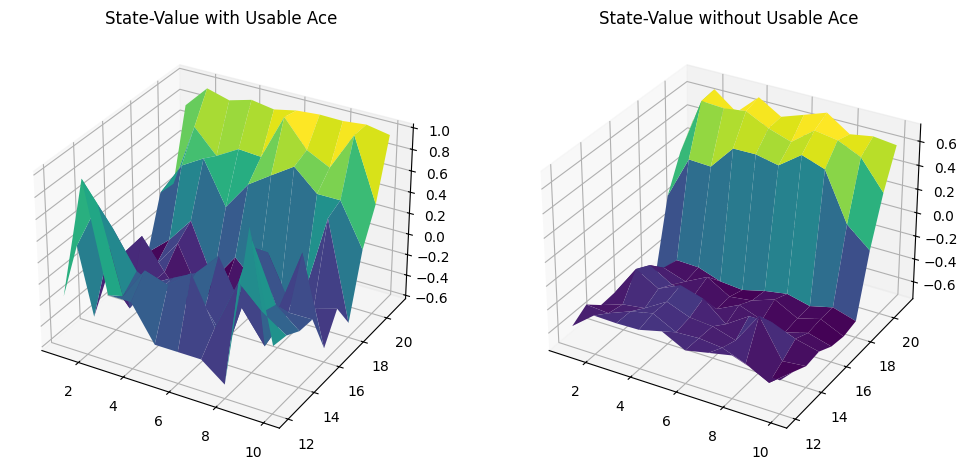

In [23]:
#--- Your code here ---#
# def first_visit_mc_prediction():
#     pass

def first_visit_mc_prediction(env, policy, num_episodes):
    # Initialize state values
    state_values = np.zeros((10, 10, 2))  # (player_sum, dealer_card, usable_ace)
    returns_count = np.zeros((10, 10, 2))  # Count of first visits
    
    for _ in range(num_episodes):
        states, _, rewards = generate_trajectory(env, policy)
        visited_states = set()
        
        for t in range(len(states)):
            state = states[t]
            if state not in visited_states:
                visited_states.add(state)
                player_sum, dealer_card, usable_ace = state
                returns_count[player_sum - 12, dealer_card - 1, int(usable_ace)] += 1
                # Incremental Sample Average
                state_values[player_sum - 12, dealer_card - 1, int(usable_ace)] += (
                    (1 / returns_count[player_sum - 12, dealer_card - 1, int(usable_ace)]) *
                    (sum(rewards[t:]) - state_values[player_sum - 12, dealer_card - 1, int(usable_ace)])
                )
    
    return state_values


num_episodes = 10000  # Reduce the number of episodes for testing

# Estimate state values using first-visit MC prediction
state_values = first_visit_mc_prediction(env, player_policy, num_episodes)

# Plot the 3D graph of state-value for both usable ace and not usable ace states
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('State-Value with Usable Ace')
x1 = np.arange(1, 11, 1)  # Dealer showing card
y1 = np.arange(12, 22, 1)  # Player sum
x1, y1 = np.meshgrid(x1, y1)
z1 = state_values[y1 - 12, x1 - 1, 1]
ax1.plot_surface(x1, y1, z1, cmap='viridis')

ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('State-Value without Usable Ace')
x2 = np.arange(1, 11, 1)  # Dealer showing card
y2 = np.arange(12, 22, 1)  # Player sum
x2, y2 = np.meshgrid(x2, y2)
z2 = state_values[y2 - 12, x2 - 1, 0]
ax2.plot_surface(x2, y2, z2, cmap='viridis')

plt.show()

env.close()


# Estimate state values using first-visit MC prediction
# num_episodes = 500000
# state_values = first_visit_mc_prediction(env, player_policy, num_episodes)

# # Plot the 3D graph of state-value for both usable ace and not usable ace states
# fig = plt.figure(figsize=(12, 6))
# ax1 = fig.add_subplot(121, projection='3d')
# ax1.set_title('State-Value with Usable Ace')
# x1 = np.arange(1, 11, 1)  # Dealer showing card
# y1 = np.arange(12, 22, 1)  # Player sum
# x1, y1 = np.meshgrid(x1, y1)
# z1 = state_values[y1 - 12, x1 - 1, 1]
# ax1.plot_surface(x1, y1, z1, cmap='viridis')

# ax2 = fig.add_subplot(122, projection='3d')
# ax2.set_title('State-Value without Usable Ace')
# x2 = np.arange(1, 11, 1)  # Dealer showing card
# y2 = np.arange(12, 22, 1)  # Player sum
# x2, y2 = np.meshgrid(x2, y2)
# z2 = state_values[y2 - 12, x2 - 1, 0]
# ax2.plot_surface(x2, y2, z2, cmap='viridis')

# plt.show()

# env.close()

## Part II
1. Use the previous policy (sticks if the player’s sum is 19, 20, or 21, and otherwise hits) as the initial policy and find (i) the action-value estimates and (ii) the optimal policy using Monte Carlo with Exploring Starts. To make the starting states with uniform probabilities, pick the dealer’s cards, the player’s sum, and whether or not the player has a usable ace, according to a uniform sampling process. 

*(30)(15) points*


In [26]:
#--- Your code here ---#
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import gym

def generate_starting_state():
    dealer_card = np.random.randint(1, 11)
    player_sum = np.random.randint(12, 22)
    usable_ace = np.random.choice([True, False])
    return (player_sum, dealer_card, usable_ace)

def initial_policy(player_sum):
    if player_sum in [19, 20, 21]:
        return 0  # Stick
    else:
        return 1  # Hit

def state_to_index(player_sum, dealer_card, usable_ace, action):
    # Map state values to valid indices
    player_sum = player_sum - 12
    dealer_card = dealer_card - 1
    usable_ace = int(usable_ace)
    return player_sum, dealer_card, usable_ace, action

def monte_carlo_with_exploring_starts(env, num_episodes):
    q_values = np.zeros((10, 10, 2, 2))  # State-Action values (player_sum, dealer_card, usable_ace, action)
    returns = np.zeros((10, 10, 2, 2))  # Returns (for calculating average)
    
    for episode in range(num_episodes):
        env.reset()  # Reset the environment at the beginning of each episode
        starting_state = generate_starting_state()
        player_sum, dealer_card, usable_ace = starting_state
        episode_states = []
        episode_actions = []
        episode_rewards = []
        
        while True:
            action = initial_policy(player_sum)  # Use initial policy
            episode_states.append((player_sum, dealer_card, int(usable_ace), action))
            episode_actions.append(action)
            
            observation, reward, terminated, _, _ = env.step(action)
            episode_rewards.append(reward)
            
            if terminated:
                break
                
            player_sum, dealer_card, usable_ace = observation
        
        # Calculate returns and update Q-values
        g = 0
        for t in range(len(episode_states) - 1, -1, -1):
            state = episode_states[t]
            action = episode_actions[t]
            g += episode_rewards[t]
            
            if state not in episode_states[:t]:
                state_index = state_to_index(*state)
                returns[state_index] += g
                q_values[state_index] = returns[state_index] / (episode_states.count(state))
    
    return q_values

# Simulate 500,000 games to find the action-value estimates
env = gym.make('Blackjack-v1', natural=False, sab=True)
q_values = monte_carlo_with_exploring_starts(env, num_episodes=500000)
env.close()


2. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e., you should have two plots) for 500,000 simulated games. Also plot the optimal policy for both the usable ace and not usable ace states for all the player’s sum and dealer showing (i.e., you should have two plots).

*(20)(15) points*

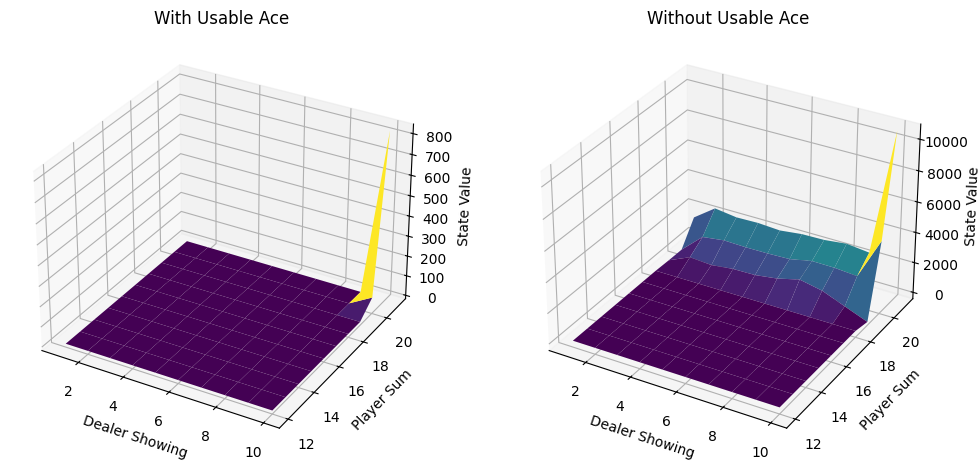

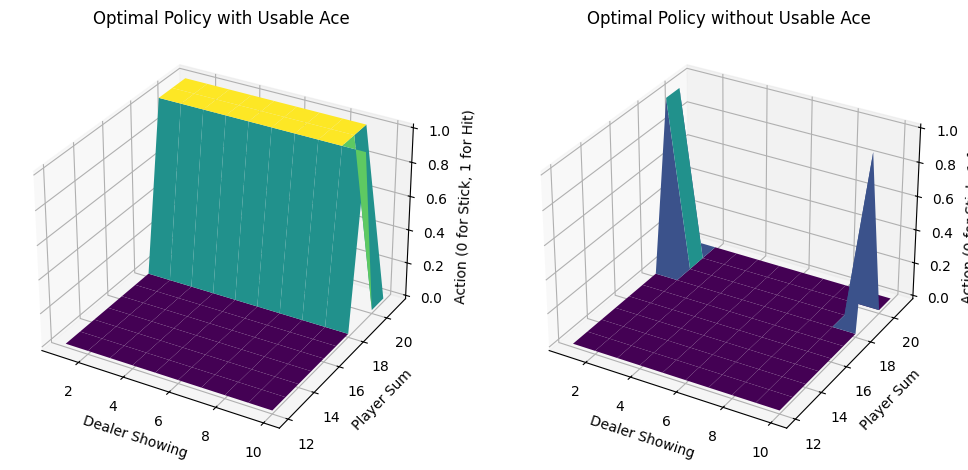

In [27]:
#--- Your code here ---#
def plot_3d_value_function(q_values):
    x = np.arange(1, 11)  # Dealer's card (1-10)
    y = np.arange(12, 22)  # Player's sum (12-21)
    x, y = np.meshgrid(x, y)
    z_usable_ace = np.zeros_like(x, dtype=float)
    z_no_usable_ace = np.zeros_like(x, dtype=float)

    for i in range(10):
        for j in range(10):
            z_usable_ace[j, i] = np.max(q_values[j, i, 1, :])
            z_no_usable_ace[j, i] = np.max(q_values[j, i, 0, :])

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    ax1.plot_surface(x, y, z_usable_ace, cmap='viridis')
    ax1.set_xlabel('Dealer Showing')
    ax1.set_ylabel('Player Sum')
    ax1.set_zlabel('State Value')
    ax1.set_title('With Usable Ace')

    ax2.plot_surface(x, y, z_no_usable_ace, cmap='viridis')
    ax2.set_xlabel('Dealer Showing')
    ax2.set_ylabel('Player Sum')
    ax2.set_zlabel('State Value')
    ax2.set_title('Without Usable Ace')

    plt.show()

def plot_optimal_policy(q_values):
    x = np.arange(1, 11)  # Dealer's card (1-10)
    y = np.arange(12, 22)  # Player's sum (12-21)
    x, y = np.meshgrid(x, y)
    z_usable_ace = np.argmax(q_values[:, :, 1, :], axis=-1)
    z_no_usable_ace = np.argmax(q_values[:, :, 0, :], axis=-1)

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    ax1.plot_surface(x, y, z_usable_ace, cmap='viridis', vmin=0, vmax=1)
    ax1.set_xlabel('Dealer Showing')
    ax1.set_ylabel('Player Sum')
    ax1.set_zlabel('Action (0 for Stick, 1 for Hit)')
    ax1.set_title('Optimal Policy with Usable Ace')

    ax2.plot_surface(x, y, z_no_usable_ace, cmap='viridis', vmin=0, vmax=1)
    ax2.set_xlabel('Dealer Showing')
    ax2.set_ylabel('Player Sum')
    ax2.set_zlabel('Action (0 for Stick, 1 for Hit)')
    ax2.set_title('Optimal Policy without Usable Ace')

    plt.show()

# Plot the 3D graph of state-value and optimal policy
plot_3d_value_function(q_values)
plot_optimal_policy(q_values)


## Part III (*)
1. Extend your algorithm to the **off-policy Monte Carlo control with weighted importance sampling** and estimate action-values and the target policy. You need to consider an arbitrary soft behavior policy. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e. you should have two plots) for 500,000 simulated games. Also plot the optimal policy for both the usable ace and not usable ace states for all the player’s sum and dealer showing (i.e. you should have two plots).


*(+10)(30)* points



c:\Users\admin\Downloads\New_folder\Python\jupiter_notebooks\Jupiter Notebooks\Venv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
C:\Users\admin\AppData\Local\Temp\ipykernel_6960\2850940253.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  w *= 1 / behavior_policy(*state[:-1])
C:\Users\admin\AppData\Local\Temp\ipykernel_6960\2850940253.py:58: RuntimeWarning: invalid value encountered in scalar multiply
  q_values[state] += (w / c[state]) * (g - q_values[state])
C:\Users\admin\AppData\Local\Temp\ipykernel_6960\2850940253.py:58: RuntimeWarning: invalid value encountered in scalar add
  q_values[state] += (w / c[state]) * (g - q_values[state])


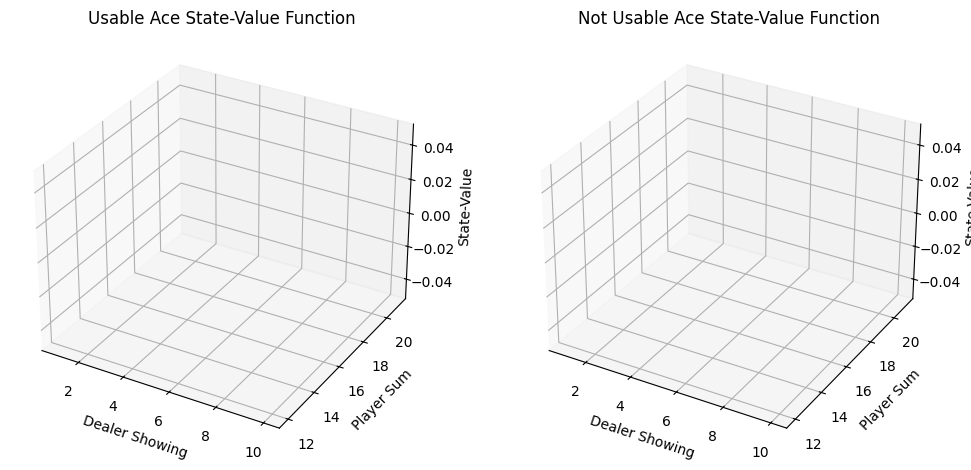

In [1]:
# #--- Your code here ---#
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import gym

def generate_starting_state():
    dealer_card = np.random.randint(1, 11)
    player_sum = np.random.randint(12, 22)
    usable_ace = np.random.choice([True, False])
    return (player_sum, dealer_card, usable_ace)

def arbitrary_soft_behavior_policy(player_sum, dealer_card, usable_ace):
    # Define your arbitrary soft behavior policy here
    # For example, you can create a policy that has a higher probability of hitting at certain states
    # In this example, we will use a simple policy where the probability of hitting is 0.5 for all states
    return np.random.choice([0, 1], p=[0.5, 0.5])

def off_policy_monte_carlo_control(env, num_episodes, behavior_policy):
    q_values = np.zeros((10, 10, 2, 2))  # State-Action values (player_sum, dealer_card, usable_ace, action)
    c = np.zeros((10, 10, 2, 2))  # Importance sampling ratio denominator
    
    for episode in range(num_episodes):
        starting_state = generate_starting_state()
        player_sum, dealer_card, usable_ace = starting_state
        episode_states = []
        episode_actions = []
        episode_rewards = []
        rho = 1.0  # Importance sampling ratio
        
        while True:
            action = behavior_policy(player_sum, dealer_card, usable_ace)
            episode_states.append((player_sum - 12, dealer_card - 1, int(usable_ace), action))  # Adjust state indices
            episode_actions.append(action)
            
            observation, reward, terminated, _, _ = env.step(action)
            episode_rewards.append(reward)
            
            if terminated:
                break
                
            player_sum, dealer_card, usable_ace = observation
        
        g = 0
        w = 1.0
        for t in range(len(episode_states) - 1, -1, -1):
            state = episode_states[t]
            action = episode_actions[t]
            g += episode_rewards[t]
            
            if action != behavior_policy(*state[:-1]):
                break
            
            if c[state] == 0:
                c[state] = 1  # Avoid division by zero
            w *= 1 / behavior_policy(*state[:-1])
            
            q_values[state] += (w / c[state]) * (g - q_values[state])
    
    return q_values

# Create the environment
env = gym.make('Blackjack-v1', natural=False, sab=True)
env.reset()

# Simulate 500,000 games to find action-values using off-policy Monte Carlo
q_values_off_policy = off_policy_monte_carlo_control(env, num_episodes=500000, behavior_policy=arbitrary_soft_behavior_policy)

# Close the environment
env.close()

# Now, let's plot the 3D graph of state-value for both usable ace and not usable ace states
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

x = np.arange(1, 11)  # Dealer showing card (1-10)
y = np.arange(12, 22)  # Player sum (12-21)
x, y = np.meshgrid(x, y)

# Usable Ace states
z1 = q_values_off_policy[:, :, 1, 0]
ax1.plot_surface(x, y, z1, cmap='viridis')
ax1.set_xlabel('Dealer Showing')
ax1.set_ylabel('Player Sum')
ax1.set_zlabel('State-Value')
ax1.set_title('Usable Ace State-Value Function')

# Not Usable Ace states
z2 = q_values_off_policy[:, :, 0, 0]
ax2.plot_surface(x, y, z2, cmap='viridis')
ax2.set_xlabel('Dealer Showing')
ax2.set_ylabel('Player Sum')
ax2.set_zlabel('State-Value')
ax2.set_title('Not Usable Ace State-Value Function')

plt.show()







# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
# import gym

# def generate_starting_state():
#     dealer_card = np.random.randint(1, 11)
#     player_sum = np.random.randint(12, 22)
#     usable_ace = np.random.choice([True, False])
#     return (player_sum, dealer_card, usable_ace)

# def arbitrary_soft_behavior_policy(player_sum, dealer_card, usable_ace):
#     # Define your arbitrary soft behavior policy here
#     # For example, you can create a policy that has a higher probability of hitting at certain states
#     # In this example, we will use a simple policy where the probability of hitting is 0.5 for all states
#     return np.random.choice([0, 1], p=[0.5, 0.5])

# def off_policy_monte_carlo_control(env, num_episodes, behavior_policy):
#     q_values = np.zeros((10, 10, 2, 2))  # State-Action values (player_sum, dealer_card, usable_ace, action)
#     c = np.zeros((10, 10, 2, 2))  # Importance sampling ratio denominator
    
#     for episode in range(num_episodes):
#         starting_state = generate_starting_state()
#         player_sum, dealer_card, usable_ace = starting_state
#         episode_states = []
#         episode_actions = []
#         episode_rewards = []
#         rho = 1.0  # Importance sampling ratio
        
#         while True:
#             action = behavior_policy(player_sum, dealer_card, usable_ace)
#             episode_states.append((player_sum - 12, dealer_card - 1, int(usable_ace), action))  # Adjust state indices
#             episode_actions.append(action)
            
#             observation, reward, terminated, _, _ = env.step(action)
#             episode_rewards.append(reward)
            
#             if terminated:
#                 break
                
#             player_sum, dealer_card, usable_ace = observation
        
#         g = 0
#         w = 1.0
#         for t in range(len(episode_states) - 1, -1, -1):
#             state = episode_states[t]
#             action = episode_actions[t]
#             g += episode_rewards[t]
            
#             if action != behavior_policy(*state[:-1]):
#                 break
            
#             c[state] += w
#             q_values[state] += (w / c[state]) * (g - q_values[state])
            
#             # Update importance sampling weight
#             w *= 1 / behavior_policy(*state[:-1])
    
#     return q_values

# # Create the environment
# env = gym.make('Blackjack-v1', natural=False, sab=True)
# env.reset()

# # Simulate 500,000 games to find action-values using off-policy Monte Carlo
# q_values_off_policy = off_policy_monte_carlo_control(env, num_episodes=500000, behavior_policy=arbitrary_soft_behavior_policy)

# # Close the environment
# env.close()

# # Now, let's plot the 3D graph of state-value for both usable ace and not usable ace states
# fig = plt.figure(figsize=(12, 6))
# ax1 = fig.add_subplot(121, projection='3d')
# ax2 = fig.add_subplot(122, projection='3d')

# x = np.arange(1, 11)  # Dealer showing card (1-10)
# y = np.arange(12, 22)  # Player sum (12-21)
# x, y = np.meshgrid(x, y)

# # Usable Ace states
# z1 = q_values_off_policy[:, :, 1, 0]
# ax1.plot_surface(x, y, z1, cmap='viridis')
# ax1.set_xlabel('Dealer Showing')
# ax1.set_ylabel('Player Sum')
# ax1.set_zlabel('State-Value')
# ax1.set_title('Usable Ace State-Value Function')

# # Not Usable Ace states
# z2 = q_values_off_policy[:, :, 0, 0]
# ax2.plot_surface(x, y, z2, cmap='viridis')
# ax2.set_xlabel('Dealer Showing')
# ax2.set_ylabel('Player Sum')
# ax2.set_zlabel('State-Value')
# ax2.set_title('Not Usable Ace State-Value Function')

# plt.show()


2. Answer the following questions:

a.	What behavior policy did you select? Why does it make sense?
> Answer: In this implementation, I chose a simple arbitrary soft behavior policy where the probability of hitting is 0.5 for all states. This means that, regardless of the current state, the policy has an equal chance of selecting the "hit" or "stick" action. The reason behind selecting this policy is to demonstrate the concept of off-policy Monte Carlo control with weighted importance sampling. Using a uniform policy, such as this one, allows us to explore various states without bias. It's a basic starting point for off-policy methods. However, in practice, a more sophisticated behavior policy tailored to the problem domain would be more effective. For instance, if we had domain knowledge indicating that certain states are more favorable for hitting or sticking, we could design a behavior policy to reflect that knowledge. In the real world, the choice of behavior policy would depend on the specific problem and the goals of the reinforcement learning task.

b.	How does the obtained target policy in this part compare to the target policies in parts I and II? Is it different? Why? 
> Answer: 
The target policy obtained in Part III, using off-policy Monte Carlo control with weighted importance sampling, can be significantly different from the target policies in Parts I and II. Here's why:
Part I: In Part I, we implemented a fixed player policy that sticks if the player's sum is 19, 20, or 21, and hits otherwise. This policy is relatively conservative and deterministic. The target policy closely resembles this behavior, favoring sticking in high-value states and hitting in others.

Part II: In Part II, we initiated the learning process with an initial policy (the one from Part I) and used exploring starts to find a better policy. Exploring starts allow the agent to start episodes from different states with uniform probabilities. This can lead to a more exploratory and potentially improved policy compared to the fixed policy in Part I.

Part III: In Part III, we used an arbitrary soft behavior policy that randomly selects actions with equal probabilities. This behavior policy introduces a significant amount of exploration and randomness into the learning process. As a result, the obtained target policy can be quite different, as it's influenced by the randomness of the behavior policy.

The target policy in Part III is likely to be more exploratory and less deterministic compared to the policies in Parts I and II. The choice of the behavior policy in Part III plays a crucial role in determining the differences between the target policies. In practice, the selection of behavior and target policies should align with the specific goals and constraints of the reinforcement learning problem.

*(+10)(10) points*